In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [5]:
df = pd.read_csv(r'data\all_month 1_limpio.csv')

In [6]:
df.head(2)

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2025-05-02T02:50:02.380Z,33.912167,-117.070000,12.69,0.89,ml,33.0,116.0,Sin datos,0.20,...,2025-05-02T02:53:47.574Z,"9 km S of Calimesa, CA",earthquake,0.31,1.31,0.167,28.0,automatic,ci,ci
1,2025-05-02T02:39:31.940Z,33.073667,-116.801333,9.34,0.82,ml,5.0,168.0,0.1396,0.15,...,2025-05-02T02:42:55.817Z,"7 km ENE of Ramona, CA",earthquake,3.87,10.42,0.388,9.0,automatic,ci,ci


### EDA (Explotatoy Data Analysis).

In [7]:
type(df['gap'].values[0])  #saber el tipo de dato en una columna concreta

str

In [8]:
df['gap'].shape  #saber la forma de una columna concreta

(10137,)

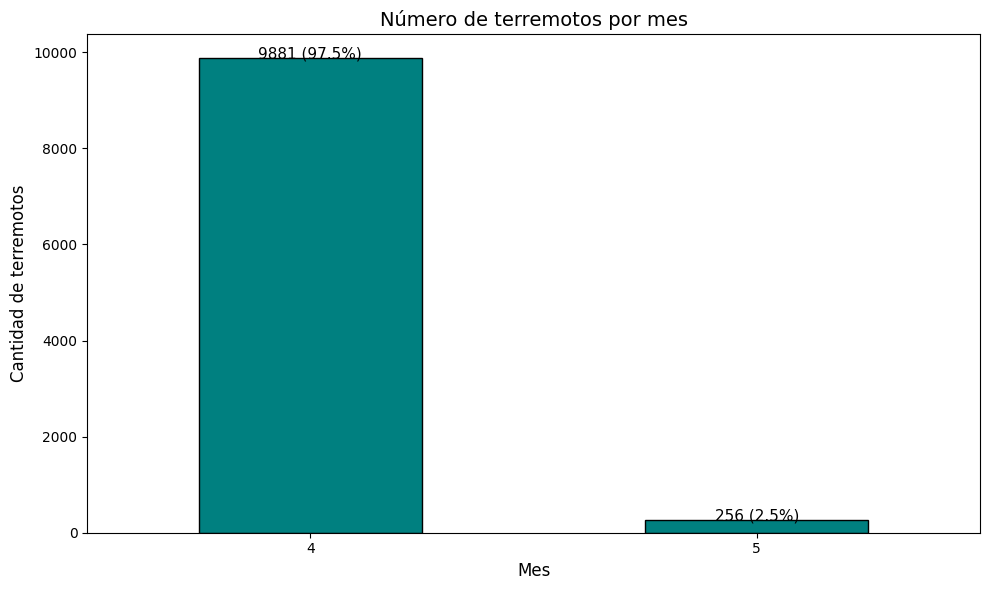

In [13]:
# Calcular frecuencia de terremotos por mes
month_counts = df['month'].value_counts().sort_index()

# Graficar
plt.figure(figsize=(10, 6))
ax = month_counts.plot(kind='bar', color='teal', edgecolor='black')
plt.title('Número de terremotos por mes', fontsize=14)
plt.xlabel('Mes', fontsize=12)
plt.ylabel('Cantidad de terremotos', fontsize=12)
plt.xticks(rotation=0)

# Añadir números y porcentaje
total_terremotos = month_counts.sum()
for i, count in enumerate(month_counts):
    percentage = (count / total_terremotos) * 100
    ax.text(i, count + 0.5, f'{count} ({percentage:.1f}%)', ha='center', fontsize=11)

plt.tight_layout()
plt.show()

Conclusiones:
Se observa que abril concentra una mayor actividad sísmica. Aunque no se puede comparar los datos, ya que en el mes de marzo solo disponemos de los datos de dos días.

Por ello vamos a comparar el día dos de ambos meses.


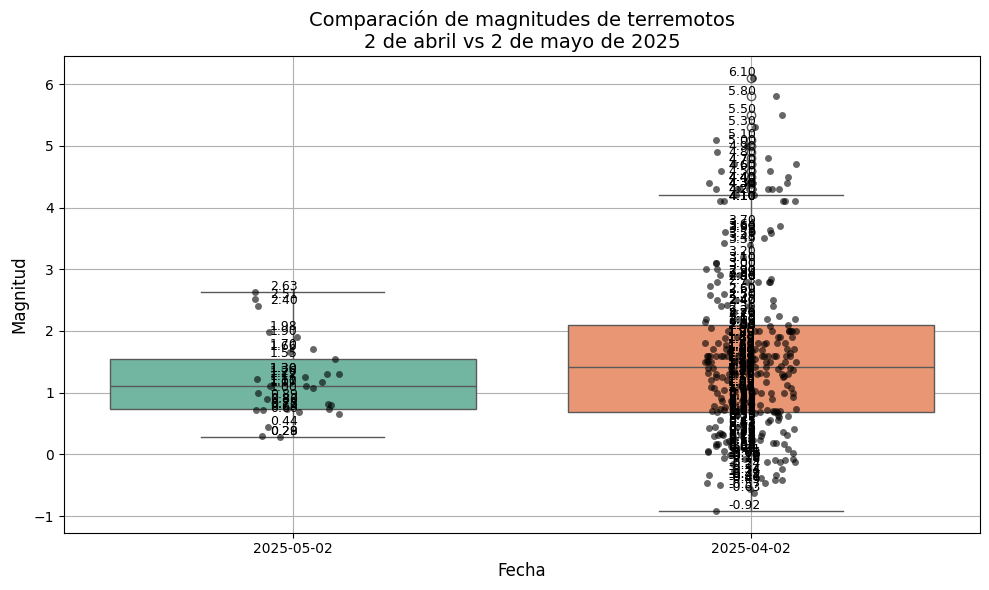

In [23]:
# comparación del día 2 de ambos meses: 
# Aseguramos formato correcto
df['time'] = pd.to_datetime(df['time'])
fechas_filtro = ['2025-04-02', '2025-05-02']
df_filtrado = df[df['time'].dt.date.astype(str).isin(fechas_filtro)].copy()
df_filtrado['hora'] = df_filtrado['time'].dt.hour
df_filtrado['fecha'] = df_filtrado['time'].dt.date.astype(str)

# Crear gráfico
plt.figure(figsize=(10, 6))
ax = sns.boxplot(data=df_filtrado, x='fecha', y='mag', palette='Set2')
sns.stripplot(data=df_filtrado, x='fecha', y='mag', color='black', alpha=0.6, jitter=True)

# Añadir los números encima de cada punto
for i, row in df_filtrado.iterrows():
    x = list(df_filtrado['fecha'].unique()).index(row['fecha'])  # posición x según la fecha
    plt.text(x=x - 0.05, y=row['mag'] + 0.03, s=f"{row['mag']:.2f}", fontsize=9, color='black')

# Estética
plt.title('Comparación de magnitudes de terremotos\n2 de abril vs 2 de mayo de 2025', fontsize=14)
plt.xlabel('Fecha', fontsize=12)
plt.ylabel('Magnitud', fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()

Conclusión: Podemos observar un mayor número de terremotos en el Mes de abril. Aunque sería interesante seguir comparando para poder sacar más conclusiones.

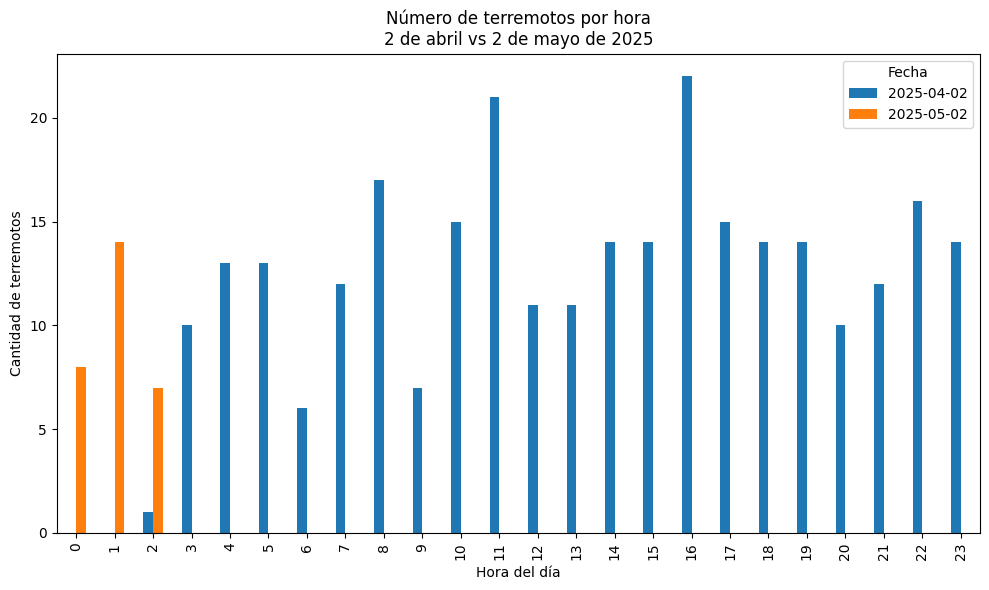

In [21]:
# Ver número de terremotos por hora en cada día
# Conteo por hora para cada fecha
conteo_por_hora = df_filtrado.groupby(['fecha', 'hora']).size().unstack(fill_value=0)

# Gráfico
conteo_por_hora.T.plot(kind='bar', figsize=(10, 6))
plt.title('Número de terremotos por hora\n2 de abril vs 2 de mayo de 2025')
plt.xlabel('Hora del día')
plt.ylabel('Cantidad de terremotos')
plt.legend(title='Fecha')
plt.tight_layout()
plt.show()

Conclusión: Viendo este gráfico observamos que faltan muchas horas del día 2 de Mayo, por lo tanto no podemos afirmar que en el mes de Abril hubieran muchos más terremotos que en Mayo, como nos podría sugerir el gráfico anterior.

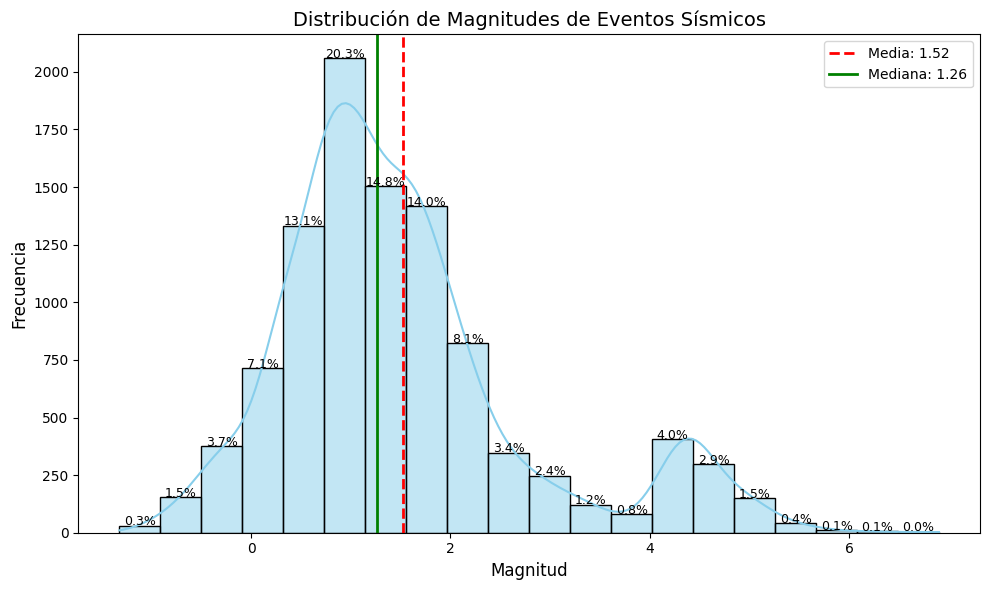

In [26]:
#Distribución de Magnitudes de Eventos sismicos con Media y Mediana
# Limpiar datos
magnitudes = df['mag'].dropna()

# Calcular media y mediana
media = magnitudes.mean()
mediana = magnitudes.median()

# Crear figura
plt.figure(figsize=(10, 6))
ax = sns.histplot(magnitudes, bins=20, kde=True, color='skyblue', edgecolor='black')

# Líneas de media y mediana
plt.axvline(media, color='red', linestyle='--', linewidth=2, label=f'Media: {media:.2f}')
plt.axvline(mediana, color='green', linestyle='-', linewidth=2, label=f'Mediana: {mediana:.2f}')

# Añadir porcentajes encima de las barras
total = len(magnitudes)
for patch in ax.patches:
    height = patch.get_height()
    if height > 0:
        x = patch.get_x() + patch.get_width() / 2
        porcentaje = (height / total) * 100
        ax.text(x, height + 0.5, f'{porcentaje:.1f}%', ha='center', fontsize=9)

# Estética
plt.title('Distribución de Magnitudes de Eventos Sísmicos', fontsize=14)
plt.xlabel('Magnitud', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.legend()
plt.tight_layout()
plt.show()

Conclusión del gráfico:
La mayoría de los terremotos registrados tienen magnitudes bajas, concentradas en torno a 1.0 a 2.0, lo que indica que son eventos leves o microterremotos, probablemente imperceptibles para los humanos.
La media y la mediana están bastante cercanas, lo que sugiere que la distribución no está fuertemente sesgada.
La forma del gráfico también indica una disminución natural de frecuencia a medida que aumenta la magnitud, como es típico en los fenómenos sísmicos.


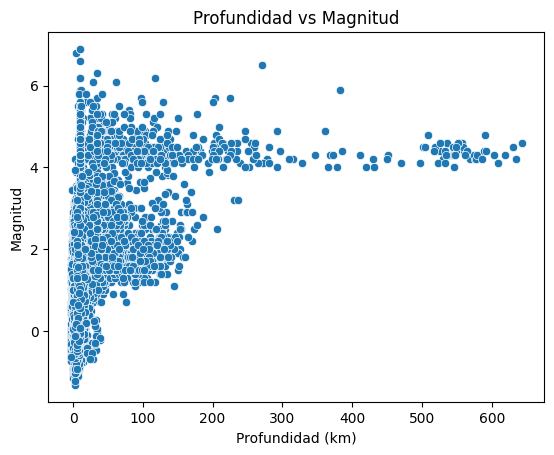

In [15]:
#Dispersión profundidad vs magnitud (scatter plot)
sns.scatterplot(data=df, x='depth', y='mag')
plt.title('Profundidad vs Magnitud')
plt.xlabel('Profundidad (km)')
plt.ylabel('Magnitud')
plt.show()


Conclusiones:

No hay una correlación fuerte visible entre la profundidad y la magnitud: terremotos poco profundos pueden ser tanto leves como fuertes.

La mayoría de los eventos son terremotos superficiales (menos de 70 km de profundidad), que son los más peligrosos para las poblaciones cercanas.

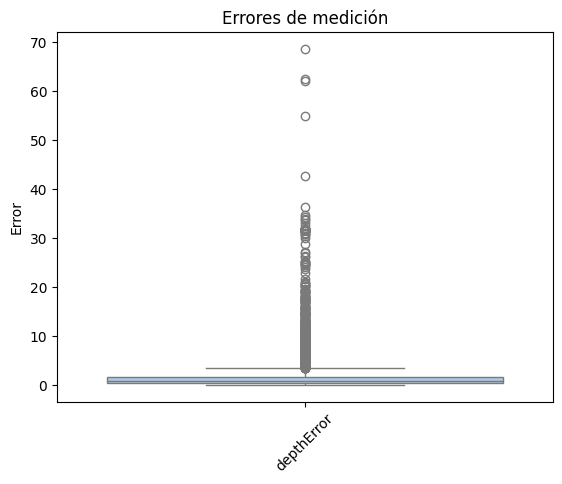

In [24]:
#Boxplot de errores de medición
# Filtra columnas con al menos un valor no nulo
cols_validas = [col for col in ['horizontalError', 'depthError', 'magError'] if df[col].dropna().shape[0] > 0]

# Crear boxplot solo con columnas válidas
sns.boxplot(data=df[cols_validas], palette='pastel')
plt.title('Errores de medición')
plt.ylabel('Error')
plt.xticks(rotation=45)
plt.show()


Conclusiones:

El error en la magnitud (magError) y la profundidad (depthError) tiende a ser bajo y consistente, lo cual indica buena calidad en las mediciones.

El error horizontal (horizontalError) puede ser más variable, posiblemente afectado por la cobertura de sensores en ciertas zonas.

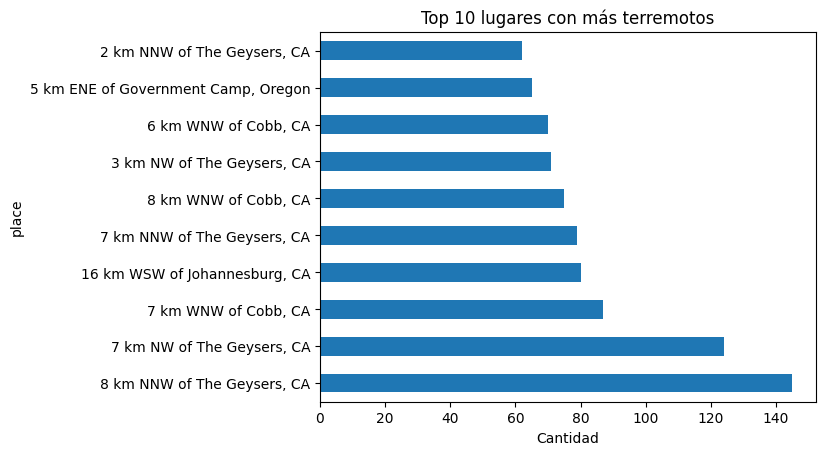

In [17]:
#Conteo de eventos por lugar o tipo (barras)
df['place'].value_counts().head(10).plot(kind='barh')
plt.title('Top 10 lugares con más terremotos')
plt.xlabel('Cantidad')
plt.show()


Conclusiones:

Lugares como "8 km NNW of The Geysers, CA" o "7 km NNW of The Geysers, CA" aparecen entre los más activos, reforzando el patrón de que California sigue siendo el epicentro sísmico más frecuente.

Estos lugares podrían ser considerados como zonas de vigilancia especial o planificación urbana reforzada.



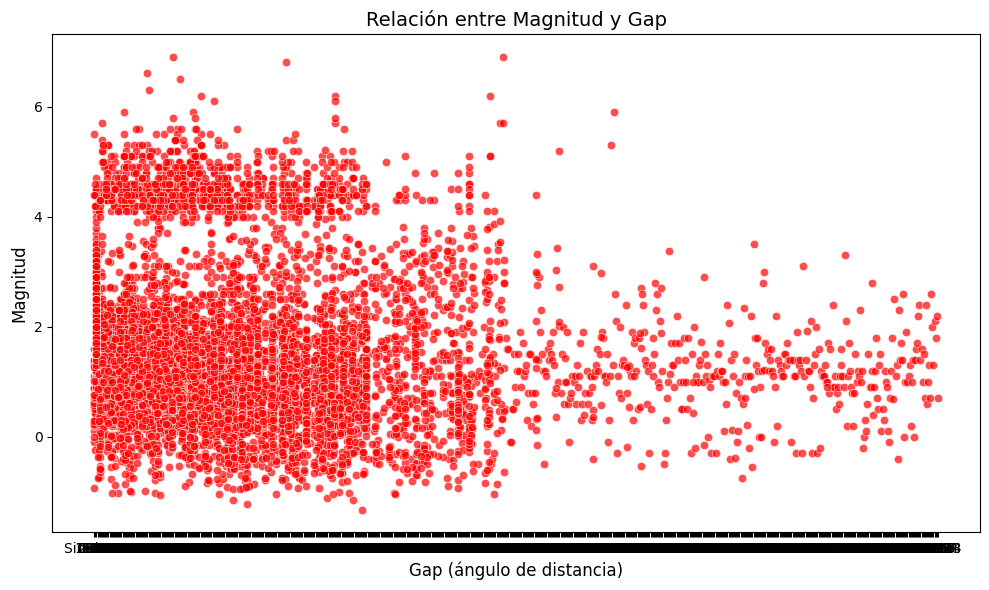

In [27]:
#Relación entre gap y mag (Magnitud vs Ángulo de distancia)

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='gap', y='mag', color='red', alpha=0.7)
plt.title('Relación entre Magnitud y Gap', fontsize=14)
plt.xlabel('Gap (ángulo de distancia)', fontsize=12)
plt.ylabel('Magnitud', fontsize=12)
plt.tight_layout()
plt.show()

Conclusión: Todas las magnitudes tienen un ángulo de distancia bajo, siendo los terremotos de menor magnitud los que tienen un ángulo de distancia ligeramente mayor.

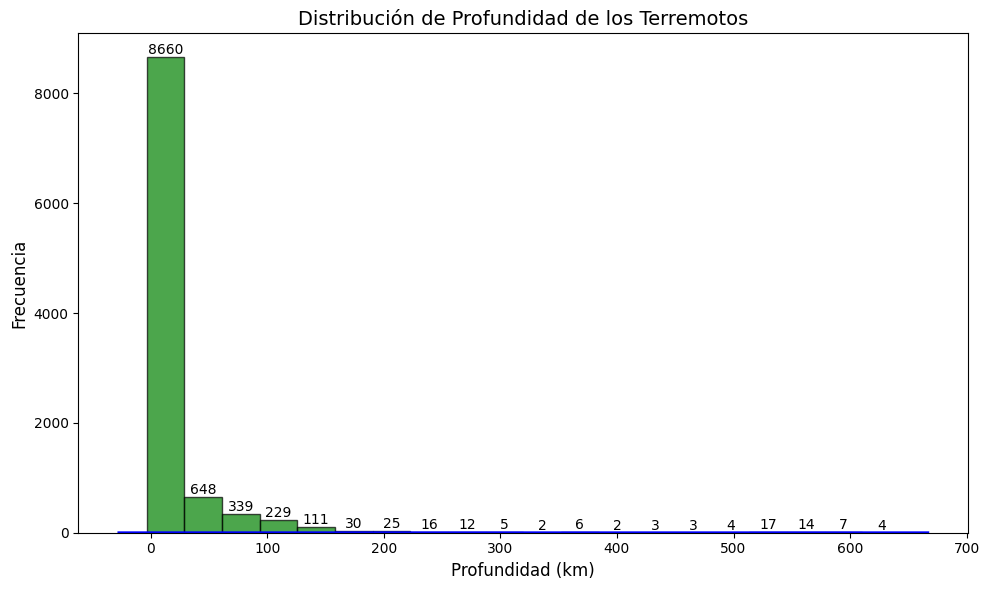

In [35]:
#Distribución de la Profundidad de los Terremotos

# Crear el gráfico
plt.figure(figsize=(10, 6))

# Calcular los valores del histograma
hist, bins, _ = plt.hist(df['depth'].dropna(), bins=20, color='green', edgecolor='black', alpha=0.7)

# Añadir KDE (Kernel Density Estimate)
sns.kdeplot(df['depth'].dropna(), color='blue', linewidth=2)

# Añadir el título y las etiquetas
plt.title('Distribución de Profundidad de los Terremotos', fontsize=14)
plt.xlabel('Profundidad (km)', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)

# Añadir los números en las barras del histograma
for i in range(len(hist)):
    plt.text(bins[i] + (bins[i+1] - bins[i]) / 2, hist[i], int(hist[i]), ha='center', va='bottom', fontsize=10)

# Mostrar el gráfico
plt.tight_layout()
plt.show()

Conclusión: Podemos observar que la mayoria de los terremotos no tienen una profuncidad elevada, concentrandose entre 0 y 0,25 la mayoría, con una frecuencia de 8660.

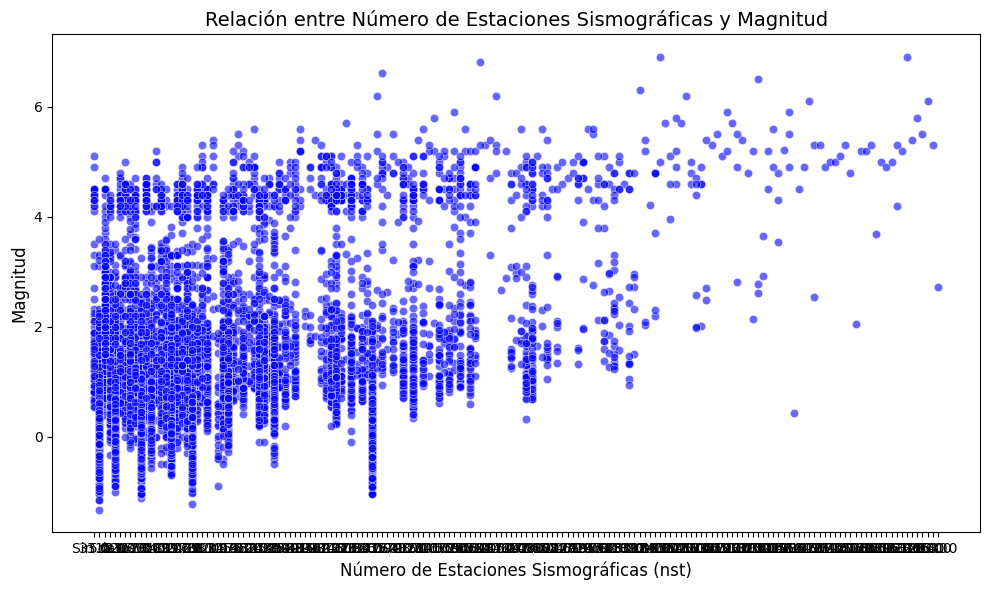

In [30]:
#Terremotos por nst (Número de Estaciones Sismográficas)

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='nst', y='mag', color='blue', alpha=0.6)
plt.title('Relación entre Número de Estaciones Sismográficas y Magnitud', fontsize=14)
plt.xlabel('Número de Estaciones Sismográficas (nst)', fontsize=12)
plt.ylabel('Magnitud', fontsize=12)
plt.tight_layout()
plt.show()

Conclusión: No se aprecia una correlación importante.

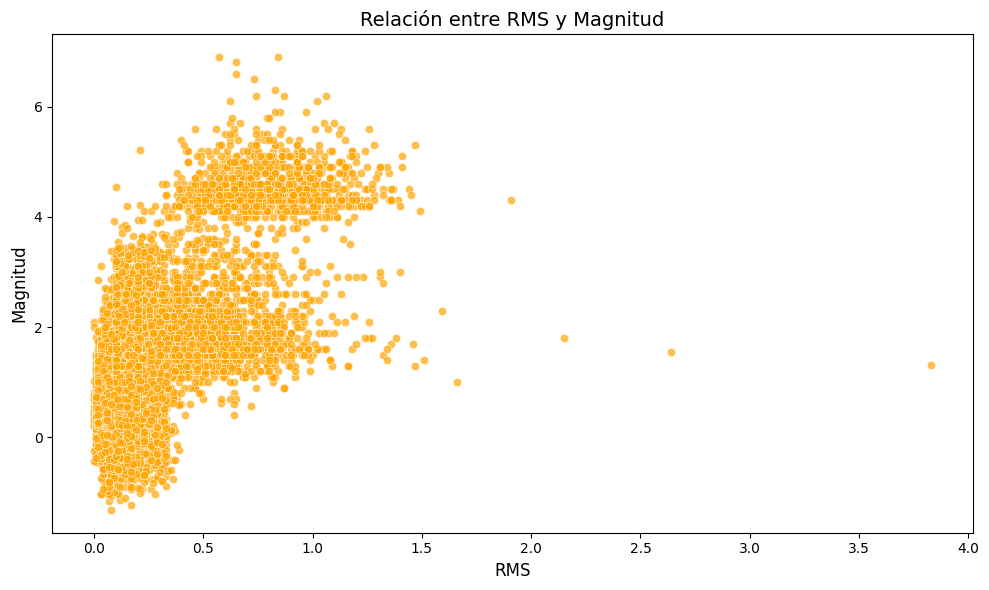

In [31]:
#Correlación entre rms y mag

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='rms', y='mag', color='orange', alpha=0.7)
plt.title('Relación entre RMS y Magnitud', fontsize=14)
plt.xlabel('RMS', fontsize=12)
plt.ylabel('Magnitud', fontsize=12)
plt.tight_layout()
plt.show()

Conclusión: No se observa una correlación importante.

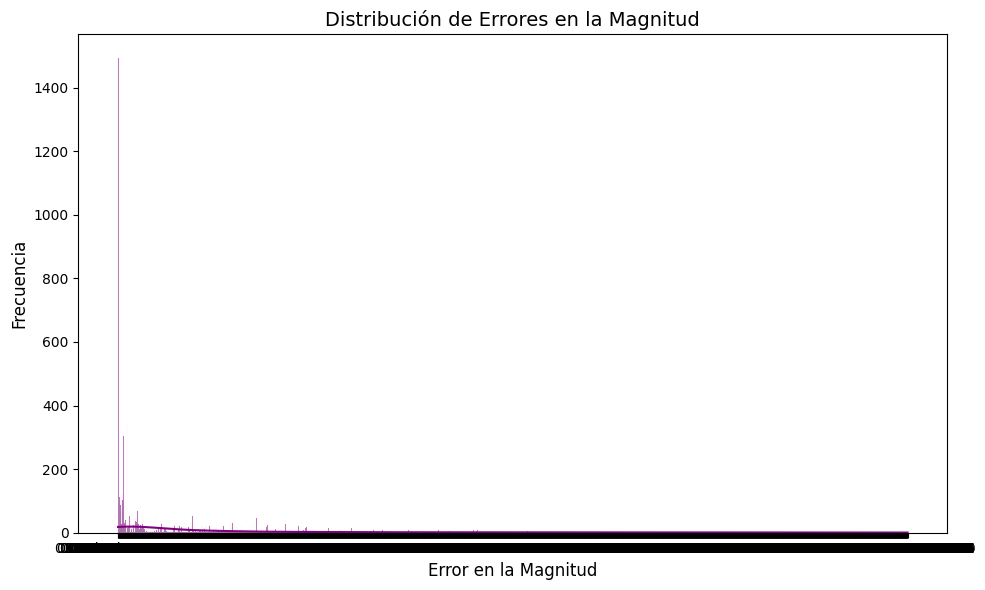

In [32]:
#Distribución de la magError (Error en la magnitud)

plt.figure(figsize=(10, 6))
sns.histplot(df['magError'].dropna(), bins=20, kde=True, color='purple', edgecolor='black')
plt.title('Distribución de Errores en la Magnitud', fontsize=14)
plt.xlabel('Error en la Magnitud', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.tight_layout()
plt.show()

Conclusión: La mayoría de los errores de magnitud están cercanos a valor 0, lo que indica que están calcularos de una forma precisa, pero podemos observar que hay un pico muy elevado, el cuál sugiere que hay algún datos medidos de una forma muy imprecisa.

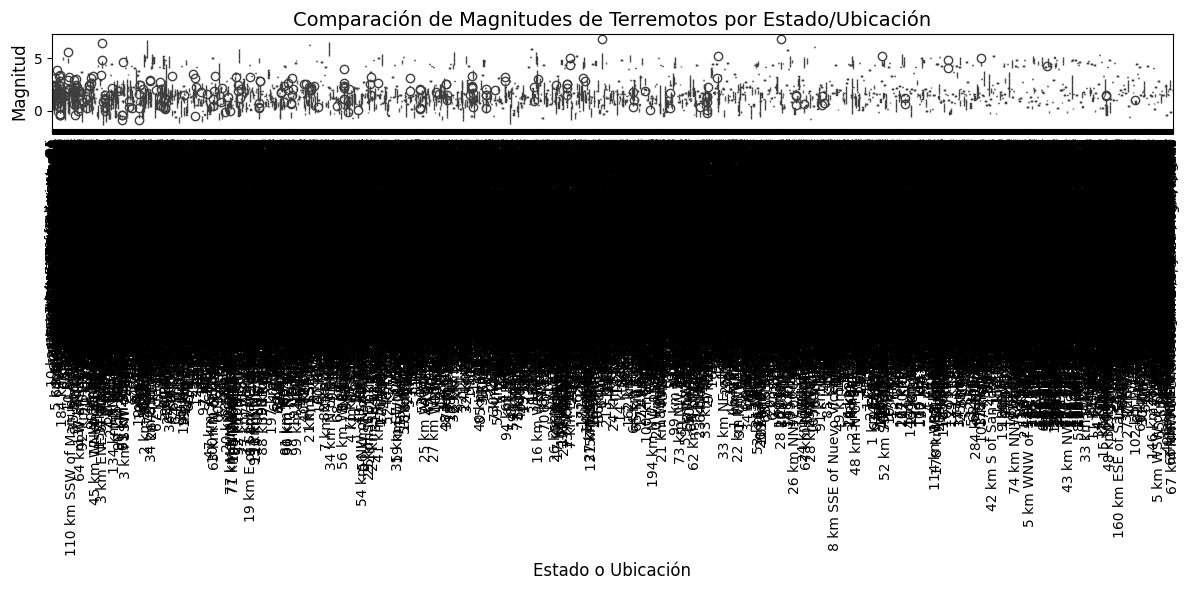

In [33]:
#Comparación de magnitudes por estado (en caso de que la columna place tenga estados)

plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='place', y='mag', palette='Set1')
plt.title('Comparación de Magnitudes de Terremotos por Estado/Ubicación', fontsize=14)
plt.xlabel('Estado o Ubicación', fontsize=12)
plt.ylabel('Magnitud', fontsize=12)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

Conclusión: Podemos observar que la magnitud de los terremotos se concentra en todas los Estados de forma similar.

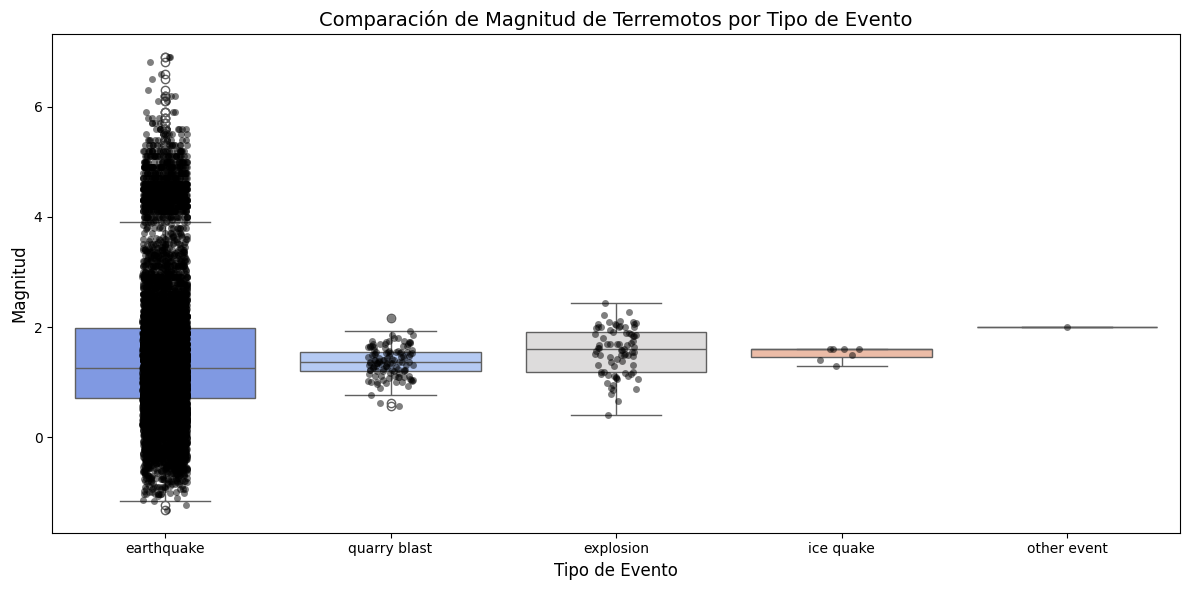

In [34]:
#Análisis de la relación entre mag y depth por tipo de evento

plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='type', y='mag', palette='coolwarm')
sns.stripplot(data=df, x='type', y='mag', color='black', alpha=0.5)
plt.title('Comparación de Magnitud de Terremotos por Tipo de Evento', fontsize=14)
plt.xlabel('Tipo de Evento', fontsize=12)
plt.ylabel('Magnitud', fontsize=12)
plt.tight_layout()
plt.show()

Conclusión: El Evento earthquaje dispone de un mayor número de Terremotos de diferentes magnitudes, siendo el más operativo.

### Conclusión general del EDA
El análisis exploratorio muestra que:

La actividad sísmica es frecuente pero de baja magnitud, predominando eventos pequeños y superficiales.

La mayoría de los terremotos están localizados en zonas esperadas como California, pero algunos aparecen en lugares menos comunes.

Los datos en general son de buena calidad, con pocos errores significativos.

No se observan terremotos catastróficos en lo que va del año, pero el monitoreo continuo sigue siendo clave.

Faltarían datos para poder observar el número de víctimas mortales, las pérdidas económicas, y poder comparar si las zonas más afectadas tienen un poder adquisitivo más elevado o más bajo.

Sería interesante poder comparar con años anteriores todos los datos y las pérdidas, tanto humanas como económicas.